#### 시계열 데이터의 EDA

In [ ]:
# EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
# 시간을 가장 많이 쏟는 단계

* 상태 공간 모형을 사용하는 것은 기존의 예측 문제와 더불어 현재 혹은 상태 변수 값을 추정하는 것을 목표로 한다는 것을 뜻함
* 대표적으로 필터링(filtering) 문제와 스무딩(smoothing)문제가 있다.


* **상태공간모형**(state-space model)이란
* 과거 데이터를 이용하여 현재값, 미래값을 추측
  * j < t --> Prediction
  * j = t --> Filter
  * j > t --> Smoothing

### 평활화(Smoothing)
* Smoothing 문제는 현재까지 수집한 관측자 y1, ..., yt 를 이요해서 현재까지의 상태 변수 히스토리 x1, ..., xt를 전체를 모두 재추정하는 문제
* 금융 분야에서 팩터 모형(factor model)의 계수를 추정하는 문제도 스무딩 문제에 속한다. 또한 시계열 자료 중 누락한 자료(missing data)가 있는 경우에도 스무딩 문제 해결을 통해 누락된 자료를 추정할 수 있다.

* 시계열 자료에서 무작위성을 줄이는 기법
* Smoothing 개념에서 Filter를 포함하기도 함

1. 이동평균 평활법(Moving Average, MA Smoothing) : 
    * 장점: Smoothing할 때 계속 평균이 이동함에 따라 최신의 값을 반영 가능하다는
    * 단점: 최신의 값과 예전 값이 모두 기본적으로 동일하게 평균이 들어감
2. 지수 평활법(Exponential Smoothing): 단순 지수평활, 이중 지수평활
    * 90일 전의 주식 데이터가 현재의 주식 예측 값에 영향을 적게 미치는 것 처럼 즉, 최근의 데이터가 가중치에 조금 더 영향을 많이 주도록, 예전 값에 decay를 넣어주는 것
3. OLS Smoothing(회귀모형 평활법)
4. Holt-Winters
5. Kernel Smoothing

In [4]:
data("AirPassengers")
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [7]:
ma3 <- filter(AirPassengers, filter=rep(1/3, 3)) # filter 뜻은 최근 연달아 나온 3개의 데이터를 더해 3으로 나누어 평균을 내는 것. 따라서 제일 앞과 제일 뒤 값이 없다.
ma3

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,120.6667,126.3333,127.3333,128.3333,134.6667,143.6667,144.0000,134.3333,119.6667,113.6667,112.3333
1950,119.6667,127.3333,134.0000,133.6667,136.3333,148.0000,163.0000,166.0000,153.6667,135.0000,129.0000,133.0000
1951,145.0000,157.6667,163.6667,171.0000,171.0000,183.0000,192.0000,194.0000,181.6667,164.0000,158.0000,161.0000
1952,172.3333,181.3333,184.6667,185.6667,194.0000,210.3333,230.0000,227.0000,214.0000,190.6667,185.6667,187.3333
1953,195.3333,209.3333,222.3333,233.3333,235.6667,245.3333,259.6667,257.6667,240.0000,209.3333,197.3333,195.0000
1954,197.6667,209.0000,216.6667,232.0000,241.6667,266.6667,286.3333,284.6667,260.3333,230.3333,220.3333,224.6667
1955,234.6667,247.3333,256.3333,268.6667,284.6667,316.3333,342.0000,341.0000,311.0000,274.3333,263.0000,266.3333
1956,279.6667,292.6667,302.3333,316.0000,335.0000,368.3333,397.3333,391.0000,355.3333,310.6667,294.3333,297.3333
1957,307.3333,324.0000,335.0000,353.0000,375.0000,414.0000,451.3333,445.3333,406.0000,352.0000,329.3333,327.0000
1958,331.3333,340.0000,342.6667,357.6667,382.0000,429.6667,477.0000,466.6667,422.6667,357.6667,335.3333,335.6667


In [8]:
(112+118+132)/3 # Feb 1949 값과 같다.

[1] 120.6667

In [9]:
ma6 <- filter(AirPassengers, filter=rep(1/6, 6)) # 최근 6개의 데이터를 더해 6으로 나누어 평균을 내는 것.
ma12 <- filter(AirPassengers, filter=rep(1/12, 12)) # 최근 12개의 데이터를 더해 12으로 나누어 평균을 내는 것.

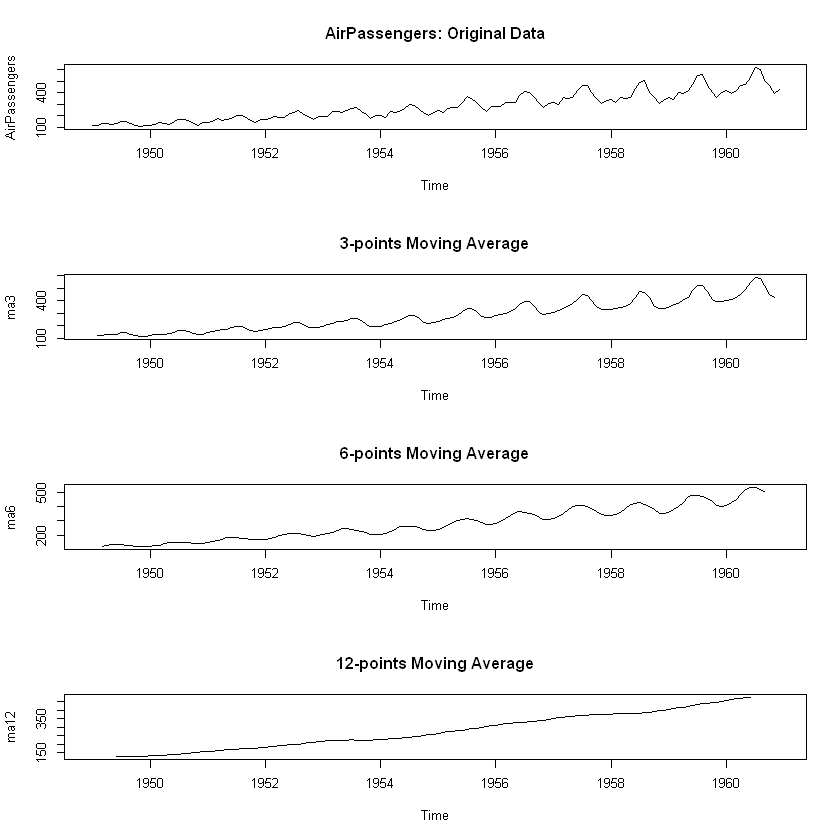

In [20]:
par(mfrow = c(4, 1))
plot(AirPassengers, main = "AirPassengers: Original Data")
plot(ma3, main = "3-points Moving Average") # 매 3월의 데이터를 평균으로 나누어 값을 냄.
plot(ma6, main = "6-points Moving Average") # 매 6월의 데이터를 평균으로 나누어 값을 냄.
plot(ma12, main = "12-points Moving Average") # 매 12월의 데이터를 평균으로 나누어 값을 냄. 단점: Seasonality(계절성)이 완전히 사라져서 정보의 손실이 있음

In [ ]:
# Milk

install.packages("TSA")

In [26]:
library(TSA)


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




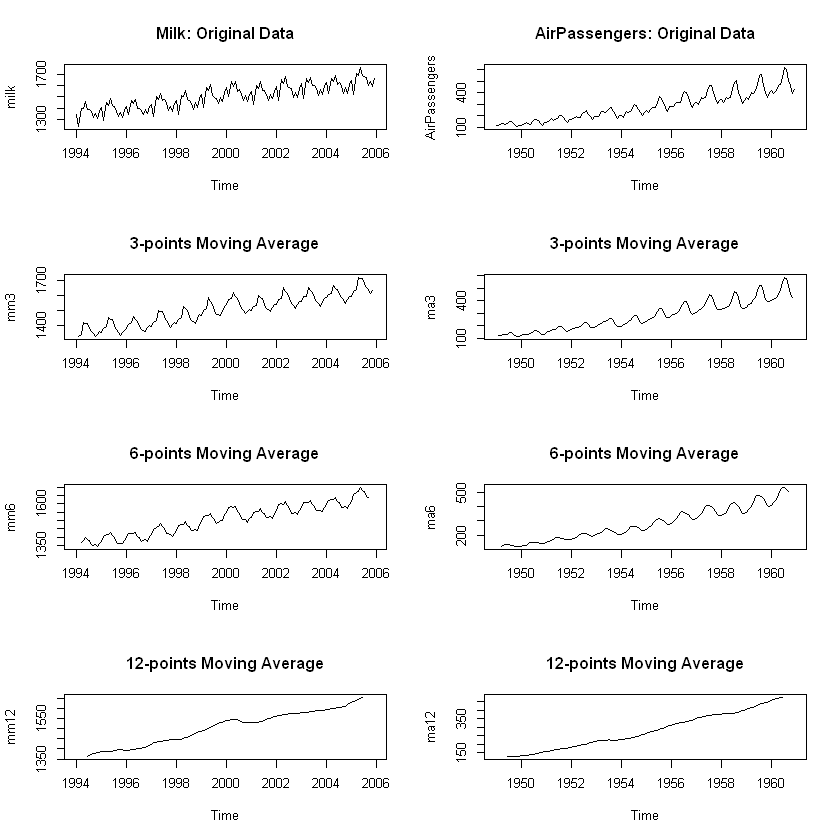

In [27]:
data(milk)

mm3 <- filter(milk, f = rep(1/3, 3))
mm6 <- filter(milk, f = rep(1/6, 6))
mm12 <- filter(milk, f = rep(1/12, 12))

par(mfcol = c(4, 2)) #mfcol 사용해서 컬럼별로 나눔
plot(milk, main = "Milk: Original Data")
plot(mm3, main = "3-points Moving Average")
plot(mm6, main = "6-points Moving Average")
plot(mm12, main = "12-points Moving Average")

plot(AirPassengers, main = "AirPassengers: Original Data")
plot(ma3, main = "3-points Moving Average")
plot(ma6, main = "6-points Moving Average")
plot(ma12, main = "12-points Moving Average")